# Recap

## Python Intro

### Typen

### Nützliche Funktionen

### Collections

### Konditionale

### Funktionen

### Rekursion und Schleifen

### Moderne Kunst in der HÜ:

Text(0.5, 1.0, '**kreatives Kreisdiagramm**')

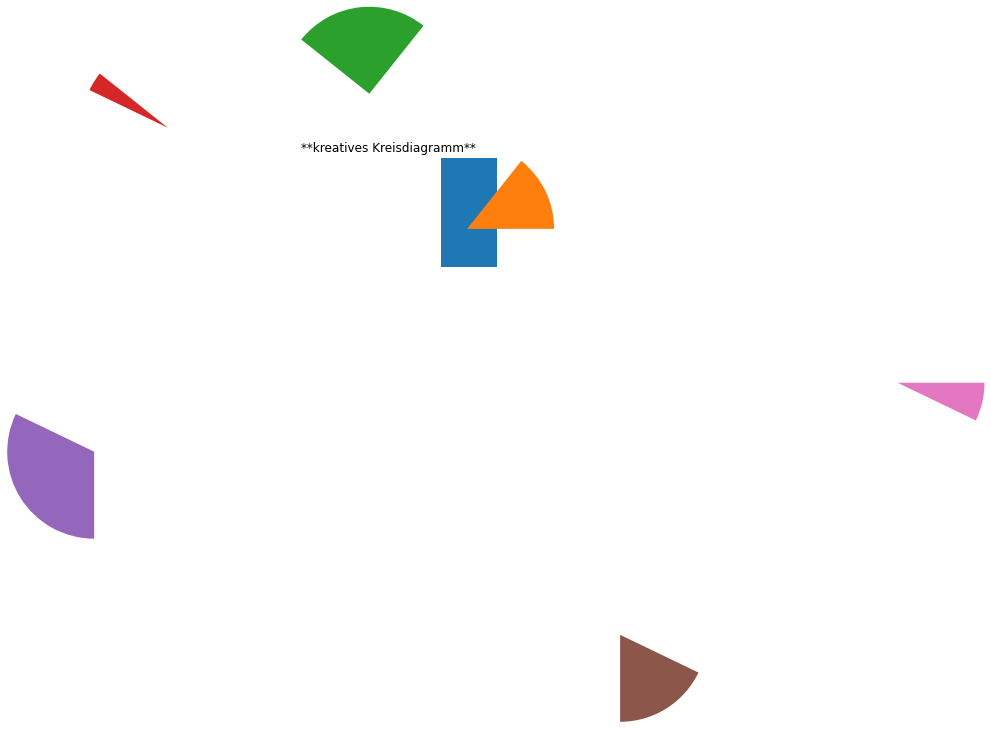

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

#Balkendiagramm
x = [4, 7, 1, 9, 5, 2]
y = [1, 2, 3, 4, 5, 6]
plt.bar(x, y) 

#Tortendiagramm
plt.pie (x, y) 
plt.title('**kreatives Kreisdiagramm**')

#Streudiagramm
#plt.scatter()

## Dynamiken im Wonderland

Lösungen zur HÜ der 3ten LV Einheit

<div class="alert alert-block alert-danger">
<h3>Übungsaufgabe: Finde zumindest eine umgeformte Variante für die Umwelt-Funktion,<br>
    mit welcher sich bei CHI = 0.01 die Umwelt dynamisch verhält.</h3>
    
Die Gleichung für den Umweltzustand $z$ so wie wir sie derzeit hier definiert hatten lautet:<br>
$z_{t+1} = z_t + \nu (z_t-z_t^2)[e^{\delta z_t^{\rho}-\omega f(x_t,y_t,z_t,p_t)}-1]$

<h4>Beziehungsweise in Python:</h4>

~~~python
def umwelt(x,y,z,p):
    g = exp(DELTA*z**RHO - OMEGA*fluss_emissionen(x,y,z,p))
    return z + NY * (z-z**2) * (g - 1.0)
~~~

Mit einer <strong>mathematischen Umformung</strong> von $z_{t+1}$ bzw. der <strong>letzten Zeile</strong> dieses Codes lässt sich das <strong>dynamische Ergebnis</strong> erreichen.

<h4>Tipps:</h4>
<i>Binome: $\quad (a-b) * (c-d) = a*c - b*c - a*d + b*d$</i>
<br><br>
<i>Herausheben: $\quad (a^2+2*a) = a * (a+2)$</i>
<br><br>
<i>Die Exponentialfunktion braucht <strong>nicht umgeformt</strong> werden!</i>

<h3>Pro Form 2 Punkte! Einen für den Code, einen für den mathematischen Ausdruck.</h3>
</div>

# Imports

In [2]:
from math import exp # Manche hatten darauf vergessen 'exp' explizit zu importieren
# Wenn man 'import math' benutzen möchte, muss man "math.exp" schreiben, da man dann 
# nur 'math' in den Namespace einfügt und im Namespace 'math' sich 'exp' befindet.
import matplotlib.pyplot as plt
%matplotlib inline

# Funktionen
(ohne Umwelt)

In [3]:
def technologie(p): return p*(1.0-CHI)
def wirtschaft(y,z): return y*(1.0+GAMMA-(GAMMA+ETA)*(1.0-z)**LAMBDA)
def population(x,y,z): return x*(1.0+geburtenrate(y,z)-sterberate(y,z))
def geburtenrate(y,z): e = y_strich(BETA,y,z); return BETA1 * (BETA2 - e/(1.0+e))
def sterberate(y,z): e = y_strich(ALPHA,y,z); return DELTA1 * (DELTA2 - e/(1.0+e)) * (1.0 + DELTA3 * (1.0-z)**THETA)
def y_strich(CONST,y,z): return exp(CONST * (y - umweltschutz(y,z)))
def fluss_emissionen(x,y,z,p): c_strich = exp(EPSILON * umweltschutz(y,z) * x); return x*y*p - KAPPA * (c_strich/(1.0+c_strich) - 0.5)
def umweltschutz(y,z): return PHI * (1.0-z)**MY * y

# Parameter
(```CHI = 0.01``` $\rightarrow$ Environmentalist's Nightmare)

In [4]:
# Geburtenrate
BETA1 = 0.04; BETA2 = 1.375; BETA = 0.16
# Sterberate
ALPHA = 0.18; DELTA1 = 0.01; DELTA2 = 2.5; DELTA3 = 4.0; THETA = 15.0
# Wirtschaft
GAMMA = 0.02; ETA = 0.1; LAMBDA = 2.0
# Umwelt
KAPPA = 2.0; EPSILON = 0.02; DELTA = 1.0; RHO = 2.0; OMEGA = 0.1; NY = 1.0
# Umweltschutz
PHI = 0.5; MY = 2.0
# Technologie
CHI = 0.01

# $\chi = 0.01$

# Umweltfunktion

In [5]:
def umwelt(x,y,z,p):
    g = exp(DELTA*z**RHO - OMEGA*fluss_emissionen(x,y,z,p))
    return z + NY * (z-z**2) * (g - 1.0)

# Darstellung

In [6]:
def plot(arg):
    umwelt, desc = arg
    fig, ax = plt.subplots()
    ax.set_title(desc)
    plt.plot([(x,z,p) for x,_,z,p in simulation(umwelt=umwelt)]);
    
x_0 = y_0 = p_0 = 1.0
z_0 = 0.98
def simulation(jahre=250,umwelt=umwelt):
    ergebnis = [(x_0,y_0,z_0,p_0)]
    for jahr in range(1,jahre):
        x, y, z, p = ergebnis[jahr-1]
        x_neu = population(x,y,z)
        y_neu = wirtschaft(y,z)
        z_neu = umwelt(x,y,z,p)
        p_neu = technologie(p)
        ergebnis.append((x_neu, y_neu, z_neu, p_neu))
    return ergebnis

# Varianten

In [7]:
g = lambda x,y,z,p: exp(DELTA*z**RHO - OMEGA*fluss_emissionen(x,y,z,p))

## Binom auflösen

In [8]:
umwelt_varianten = [
    (lambda x,y,z,p: z + NY * (z-z**2) * (g(x,y,z,p) - 1.0), 'Usprünglich')
    
    # Binom auflösen
    , (lambda x,y,z,p: z + NY * (z*g(x,y,z,p) - g(x,y,z,p)*z**2 + z**2 - z), 'binom aufgelöst')
    , (lambda x,y,z,p: z + NY * (z*g(x,y,z,p) - z + z**2 - g(x,y,z,p)*z**2), 'binom aufgelöst')
    , (lambda x,y,z,p: z + NY * (z*g(x,y,z,p) - g(x,y,z,p)*z**2 - z + z**2), 'binom aufgelöst')
    
    # werden die positiven Terme zuerst gereiht, funktioniert es
    , (lambda x,y,z,p: z + NY * (z**2.0 + z*g(x,y,z,p) - g(x,y,z,p)*z**2 - z), 'binom aufgelöst')
    , (lambda x,y,z,p: z + NY * (z*g(x,y,z,p) + z**2 - g(x,y,z,p)*z**2 - z), 'binom aufgelöst') 
]

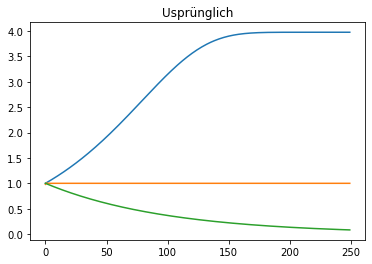

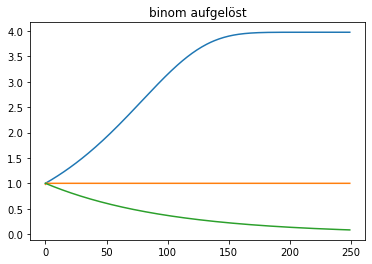

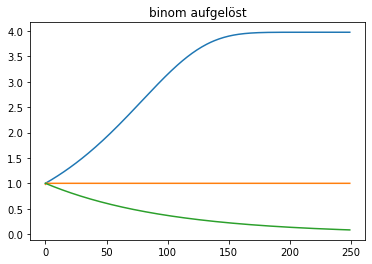

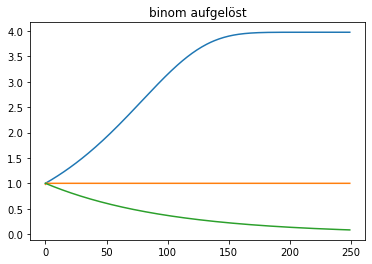

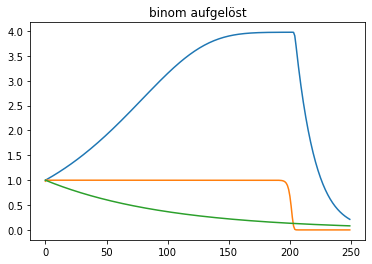

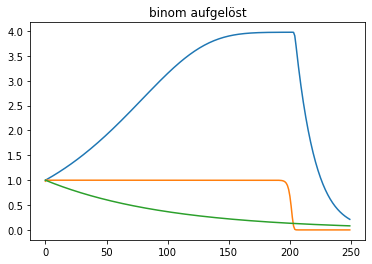

In [9]:
for variante in umwelt_varianten:
    plot(variante);

## Ausmultiplizieren

In [10]:
umwelt_varianten = [
    # Ausmultiplizieren
    # folgende funktionierten vorher nicht
     (lambda x,y,z,p: z + NY*z*g(x,y,z,p) - NY*g(x,y,z,p)*z**2 + NY*z**2 - NY*z, 'binom aufgelöst + ausmultipliziert')
    , (lambda x,y,z,p: z + NY*z*g(x,y,z,p) - NY*z + NY*z**2 - NY*g(x,y,z,p)*z**2, 'binom aufgelöst + ausmultipliziert')
    , (lambda x,y,z,p: z + NY*z*g(x,y,z,p) - NY*g(x,y,z,p)*z**2 - NY*z + NY*z**2, 'binom aufgelöst + ausmultipliziert')
    
    # folgende funktionierten vorher schon
    , (lambda x,y,z,p: z + NY * z**2.0 + NY*z*g(x,y,z,p) - NY*g(x,y,z,p)*z**2 - NY*z, 'binom aufgelöst + ausmultipliziert')
    , (lambda x,y,z,p: z + NY * z*g(x,y,z,p) + NY*z**2 - NY*g(x,y,z,p)*z**2 - NY*z, 'binom aufgelöst + ausmultipliziert')
]

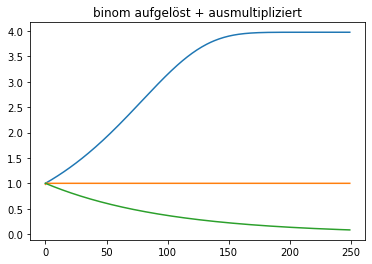

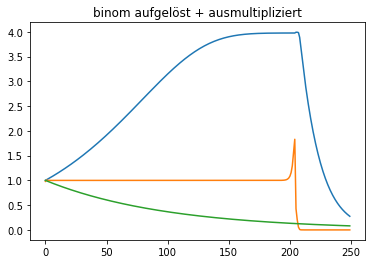

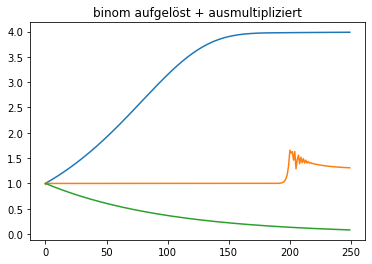

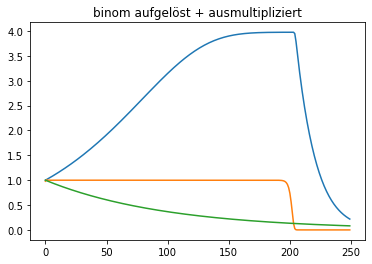

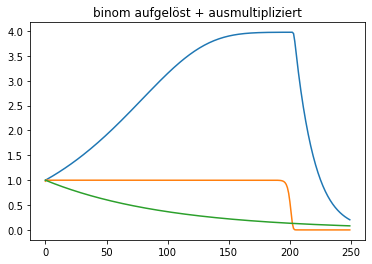

In [11]:
for variante in umwelt_varianten:
    plot(variante);

## Herausheben

In [12]:
umwelt_varianten = [
    # Herausheben
    # folgende funktionierten zuerst nicht
     (lambda x,y,z,p: z * (1 + NY*g(x,y,z,p) - NY*g(x,y,z,p)*z + NY*z - NY), 'binom aufgelöst + ausmultipliziert + herausgehoben')
    , (lambda x,y,z,p: z * (1 + NY*g(x,y,z,p) - NY + NY*z - NY*g(x,y,z,p)*z), 'binom aufgelöst + ausmultipliziert + herausgehoben')
    , (lambda x,y,z,p: z * (1 + NY*g(x,y,z,p) - NY*g(x,y,z,p)*z - NY + NY*z), 'binom aufgelöst + ausmultipliziert + herausgehoben')
    
    # folgende funktionierten zuerst schon
    , (lambda x,y,z,p: z * (1 + NY * z + NY*g(x,y,z,p) - NY*g(x,y,z,p)*z - NY), 'binom aufgelöst + ausmultipliziert + herausgehoben')
    , (lambda x,y,z,p: z * (1 + NY * g(x,y,z,p) + NY*z - NY*g(x,y,z,p)*z - NY), 'binom aufgelöst + ausmultipliziert + herausgehoben')
]

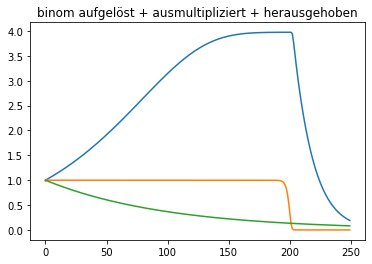

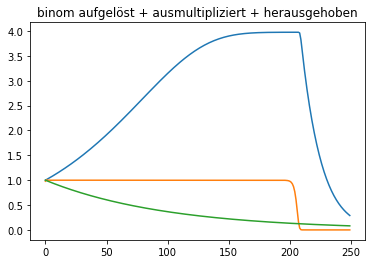

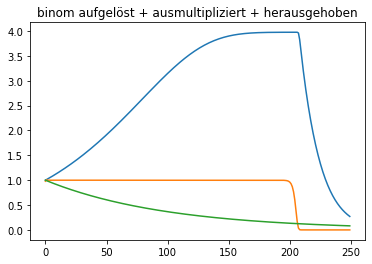

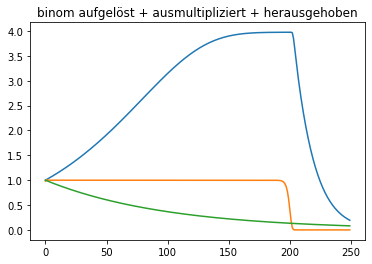

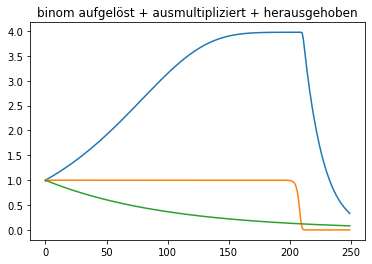

In [13]:
for variante in umwelt_varianten:
    plot(variante);

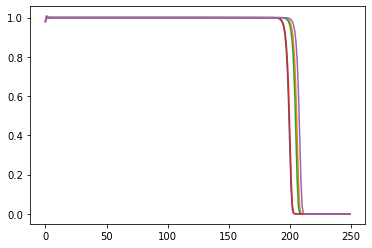

In [14]:
for u,_ in umwelt_varianten:
    plt.plot([z for _,_,z,p in simulation(umwelt=u)])

## Andere Ergebnisse

In [15]:
umwelt_varianten = [
    (lambda x,y,z,p: (z**2 *g(x,y,z,p)*NY) * (1/(z*g(x,y,z,p)*NY) + 1/z - 1 - 1/(z*g(x,y,z,p))+ 1/g(x,y,z,p)),'(z² g NY) herausgehoben')
    , (lambda x,y,z,p: g(x,y,z,p) * (z/g(x,y,z,p) + NY*z - NY*z**2 - (NY*z)/g(x,y,z,p) + (NY*z**2)/g(x,y,z,p)), 'g herausgehoben')
    , (lambda x,y,z,p: z**2 * (1/z + NY * g(x,y,z,p)/z - NY * g(x,y,z,p) - NY/z + NY), 'z² herausgehoben')   
]

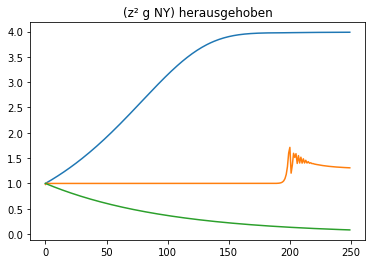

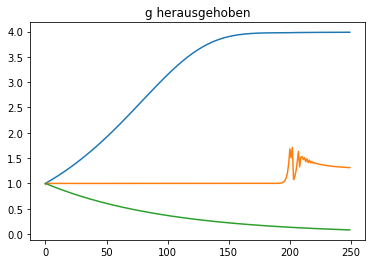

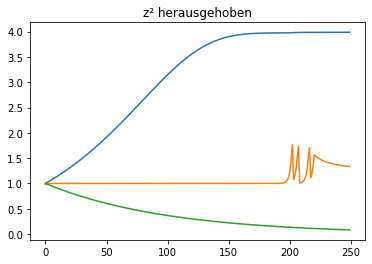

In [16]:
for variante in umwelt_varianten:
    plot(variante);

# Findings

+ 3 Prototypen

### Shakey
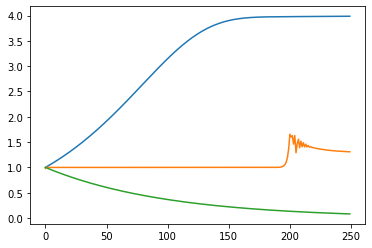

### Spikey
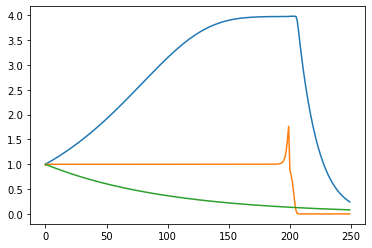

### Dropey
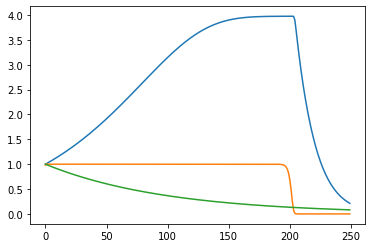

# Kommutativität

Auf den meisten Computern würde eine Ausgabe des **tatsächlichen Werts** von ```0.1``` in Python <br>
in etwa so aussehen:

~~~python
>>> 0.1
0.1000000000000000055511151231257827021181583404541015625
~~~

Daher gilt mitunter die uns aus der Mathematik bekannte **Kommutativität** nicht in Programmiersprachen

$x+(y+z)\neq(x+y)+z$

Die **Reihenfolge** wird aber **nicht nur durch Klammern** bestimmt! Auch die Reihenfolge im Code zählt.

# Was ist aber die richtige Lösung?

[*Sanderson, W.C. (1992). Simulation Models of Economic, Demographic,
and Environmental Interactions: Are They on a Sustainable Development
Path?. Laxenburg: International Institute for Applied Systems Analysis.*](http://pure.iiasa.ac.at/id/eprint/3613/)